# Type of Machine Learning Problem

There are nine different classes a genetic mutation can be classified into => Multi class classification problem

# Reading Gene and Variation Data

In [5]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

In [6]:
data = pd.read_csv('/home/keenu/Documents/datasets/cancer-diagonsis/training_variants')
data.head()

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [7]:
data_txt = pd.read_csv("/home/keenu/Documents/datasets/cancer-diagonsis/training_text",sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)
data_txt.head()


,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


In [8]:
from nltk.corpus import stopwords

In [21]:
import re
def nlp_process(total_text, index, column):
    if type(total_text) is not int:
        string =  ""
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
        total_text = re.sub('\s+',' ', total_text)
        total_text = total_text.lower()
        
        for word in total_text.split():
        # if the word is a not a stop word then retain that word from the data
            if not word in stop_words:
                string.append(word)
        
        data_text[column][index] = string

In [16]:
data = pd.merge(data, data_txt,on='ID', how='left')
data.head(10)

,ID,Gene,Variation,Class,TEXT_x,TEXT_y,TEXT
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...,Cyclin-dependent kinases (CDKs) regulate a var...,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...,Abstract Background Non-small cell lung canc...,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...,Abstract Background Non-small cell lung canc...,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...,Recent evidence has demonstrated that acquired...,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...,Oncogenic mutations in the monomeric Casitas B...,Oncogenic mutations in the monomeric Casitas B...
5,5,CBL,V391I,4,Oncogenic mutations in the monomeric Casitas B...,Oncogenic mutations in the monomeric Casitas B...,Oncogenic mutations in the monomeric Casitas B...
6,6,CBL,V430M,5,Oncogenic mutations in the monomeric Casitas B...,Oncogenic mutations in the monomeric Casitas B...,Oncogenic mutations in the monomeric Casitas B...
7,7,CBL,Deletion,1,CBL is a negative regulator of activated recep...,CBL is a negative regulator of activated recep...,CBL is a negative regulator of activated recep...
8,8,CBL,Y371H,4,Abstract Juvenile myelomonocytic leukemia (JM...,Abstract Juvenile myelomonocytic leukemia (JM...,Abstract Juvenile myelomonocytic leukemia (JM...
9,9,CBL,C384R,4,Abstract Juvenile myelomonocytic leukemia (JM...,Abstract Juvenile myelomonocytic leukemia (JM...,Abstract Juvenile myelomonocytic leukemia (JM...


In [18]:
data[data.isnull().any(axis=1)]

,ID,Gene,Variation,Class,TEXT_x,TEXT_y,TEXT
1109,1109,FANCA,S1088F,1,NaN,NaN,NaN
1277,1277,ARID5B,Truncating Mutations,1,NaN,NaN,NaN
1407,1407,FGFR3,K508M,6,NaN,NaN,NaN
1639,1639,FLT1,Amplification,6,NaN,NaN,NaN
2755,2755,BRAF,G596C,7,NaN,NaN,NaN


In [19]:
data.loc[data['TEXT'].isnull(),'TEXT'] = data['Gene'] +' '+data['Variation']

In [20]:
data[data['ID']==1639]

,ID,Gene,Variation,Class,TEXT_x,TEXT_y,TEXT
1639,1639,FLT1,Amplification,6,NaN,NaN,FLT1 Amplification


In [24]:
from sklearn.model_selection import train_test_split


#ratio is train: test : cv ----64:20:16
y_true = data['Class'].values
data.Gene      = data.Gene.str.replace('\s+', '_')
data.Variation = data.Variation.str.replace('\s+', '_')

# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(data, y_true, stratify=y_true, test_size=0.2)
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

In [35]:
train_df.shape[0]

2124

In [32]:
train_class_distribution = train_df['Class'].value_counts()
test_class_distribution = test_df['Class'].value_counts()
cv_class_distribution = cv_df['Class'].value_counts()



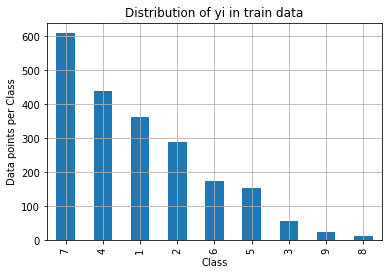

In [33]:
my_colors = 'rgbkymc'
train_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

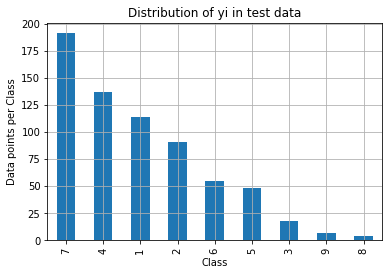

In [34]:
my_colors = 'rgbkymc'
test_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()


In [36]:
from sklearn.metrics import confusion_matrix

def plot_confision_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A = (((C.T)/(C.sum(axis=1))).T)     #divid each element of the confusion matrix with the sum of elements in that column

    B = (C/C.sum(axis=0))      #divid each element of the confusion matrix with the sum of elements in that row

    labels = [1,2,3,4,5,6,7,8,9]
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    
